In [1]:
import os
import subprocess
import gzip
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

# prepare list

In [52]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Overlap')

In [54]:
listInput_total = {}
for C_class in ['CHM', 'CHnonM', 'CMnonH'] :
    earlyEmbryo     = set(pd.read_csv(f'EarlyEmbryogenesis.{C_class}.txt', sep = '\t', header = None)[0].tolist())
    PGC             = set(pd.read_csv(f'PGCsDevelopment.{C_class}.txt',    sep = '\t', header = None)[0].tolist())
    spermatogenesis = set(pd.read_csv(f'Spermatogenesis.{C_class}.txt',    sep = '\t', header = None)[0].tolist())
    retinal         = set(pd.read_csv(f'RetinalDevelopment.{C_class}.txt', sep = '\t', header = None)[0].tolist())
    heart           = set(pd.read_csv(f'HeartDevelopment.{C_class}.txt',   sep = '\t', header = None)[0].tolist())
    liver           = set(pd.read_csv(f'LiverDevelopment.{C_class}.txt',   sep = '\t', header = None)[0].tolist())
   
    listInput = {'Early embryo development': earlyEmbryo, 'PGC development': PGC, 'Spermatogenesis': spermatogenesis, 'Retinal development': retinal, 'Heart development': heart, 'Liver development': liver}
    listInput_total[C_class] = listInput


# venn plot

## custom cmap

In [23]:
from colour import Color
from matplotlib.colors import LinearSegmentedColormap
def make_Ramp( ramp_colors ): 
    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

In [24]:
my_cmap_process6 = make_Ramp(['#9B1C3D', '#16557A', '#1B9E77', '#BF8B12', '#666666', '#AFADAC'])

In [56]:
my_cmap_process_rmb = make_Ramp(['#cb364a', '#509a80', '#a05d46', '#5091c0', '#684e94', '#46776d'])

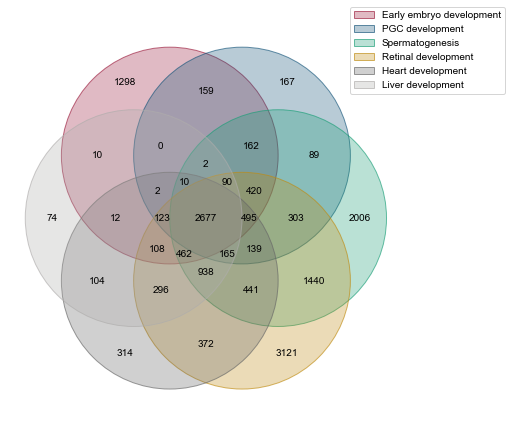

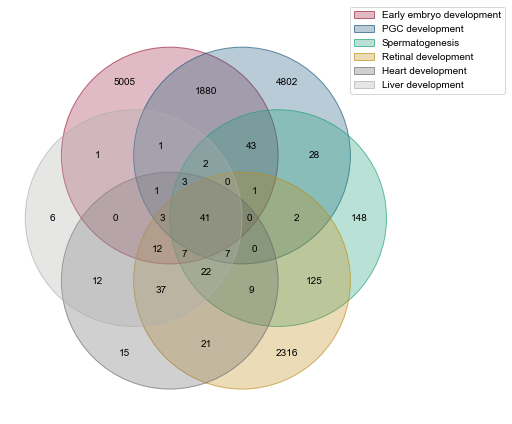

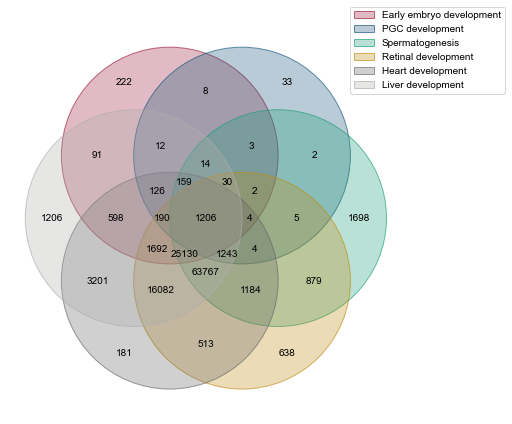

In [55]:
from venn import pseudovenn
from venn import get_labels

for C_class in ['CHM', 'CHnonM', 'CMnonH'] :
# for C_class in ['CHM'] :
    fig, ax = plt.subplots(figsize=(6.4 * 1.25, 4.8 * 1.25), tight_layout = True)
    pseudovenn(
        listInput_total[C_class], 
        cmap=my_cmap_process6,
        ax = ax,
        alpha=0.3,
        hint_hidden = False,
        fontsize=10,
        legend_loc=None,
        
    )
    ax.legend(listInput_total[C_class].keys(), loc='lower left', bbox_to_anchor=(.85, .8))
    fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make3_venn6_{C_class}_process_intersection.pdf', transparent = True)


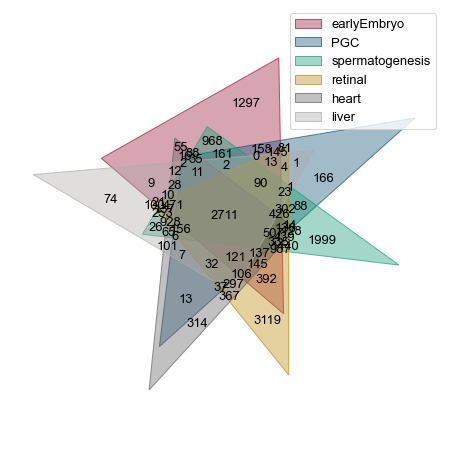

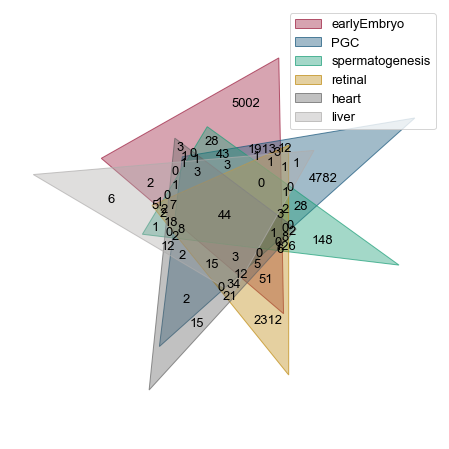

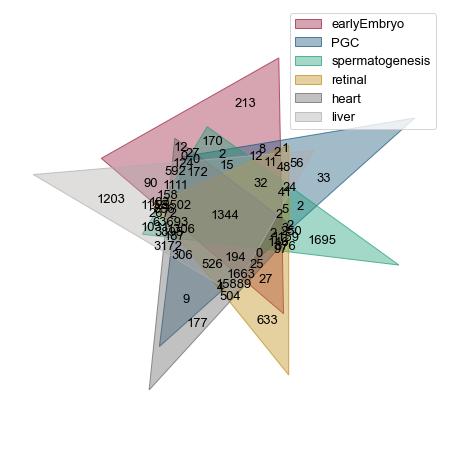

In [26]:
from venn import venn

dataset_dict = {
    name: set(choice(1000, 700, replace=False))
    for name in islice(letters, 6)
}
for C_class in ['CHM', 'CHnonM', 'CMnonH'] :
    venn(listInput_total[C_class], cmap=my_cmap_process6)